## Probability vs Likelihood

*This notebook builds up the fundamental concepts of likelihood from first principles, starting with the crucial distinction between probability and likelihood.*


### The Fundamental Distinction

Before diving into likelihood, we need to understand the crucial difference between **probability** and **likelihood**. This distinction is often the source of confusion, but it's essential for understanding statistical inference.

- **Probability**: Given a model with known parameters, what's the probability of observing specific data?
- **Likelihood**: Given observed data, how likely are different parameter values?

The key insight is that we're looking at the same mathematical object from different perspectives.


### Intuitive Example: Coin Flipping

Let's start with a simple coin flipping example to build intuition.

**Scenario**: We have a coin that might be biased. We want to understand the difference between probability and likelihood.

#### The Probability Perspective

Suppose we know the coin has a 70% chance of landing heads (p = 0.7).

- **Question**: What's the probability of getting exactly 3 heads in 5 flips?
- **Answer**: This is a probability question. We use the binomial distribution:

$$P(3 \text{ heads in } 5 \text{ flips} | p = 0.7) = \binom{5}{3} \cdot 0.7^3 \cdot 0.3^2$$

#### The Likelihood Perspective

Now suppose we observe 3 heads in 5 flips, but we don't know the coin's bias.

- **Question**: How likely is it that the coin has different bias values?
- **Answer**: This is a likelihood question. We want to know L(p | 3 heads in 5 flips) for different values of p.

The likelihood function tells us how "likely" different parameter values are given our observed data.


### Mathematical Foundation

Let's formalize this distinction mathematically.

#### Probability Function

For a given model with parameters θ, the probability function tells us the probability of observing data X:

$$P(X | \theta)$$

This is a function of X (the data), with θ (parameters) held constant.

#### Likelihood Function

For observed data X, the likelihood function tells us how likely different parameter values θ are:

$$L(\theta | X)$$

This is a function of θ (the parameters), with X (the data) held constant.

#### The Key Relationship

The crucial insight is that these are the same mathematical object viewed from different perspectives:

$$L(\theta | X) = P(X | \theta)$$

The difference is in what we consider the variable and what we consider fixed:
- **Probability**: X varies, θ is fixed
- **Likelihood**: θ varies, X is fixed


### Implementation: Coin Flipping Example

Let's implement both perspectives to see the difference clearly.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import comb

# Set up the problem
n_flips = 5
observed_heads = 3
known_bias = 0.7  # For probability calculations

print(f"Scenario: {n_flips} coin flips, observed {observed_heads} heads")
print(f"Known bias (for probability): {known_bias}")


Scenario: 5 coin flips, observed 3 heads
Known bias (for probability): 0.7


#### Probability Perspective: Fixed Parameter, Varying Data

Given a coin with known bias p = 0.7, what's the probability of getting different numbers of heads?


In [2]:
# Probability perspective: fixed parameter, varying data
possible_heads = range(n_flips + 1)
probabilities = [binom.pmf(k, n_flips, known_bias) for k in possible_heads]

print("Probability Perspective (p = 0.7 fixed):")
print("Number of Heads | Probability")
print("-" * 35)
for k, prob in zip(possible_heads, probabilities):
    print(f"{k:15} | {prob:.4f}")

# Highlight the observed outcome
observed_prob = binom.pmf(observed_heads, n_flips, known_bias)
print(f"\nProbability of observing {observed_heads} heads: {observed_prob:.4f}")


Probability Perspective (p = 0.7 fixed):
Number of Heads | Probability
-----------------------------------
              0 | 0.0024
              1 | 0.0283
              2 | 0.1323
              3 | 0.3087
              4 | 0.3601
              5 | 0.1681

Probability of observing 3 heads: 0.3087


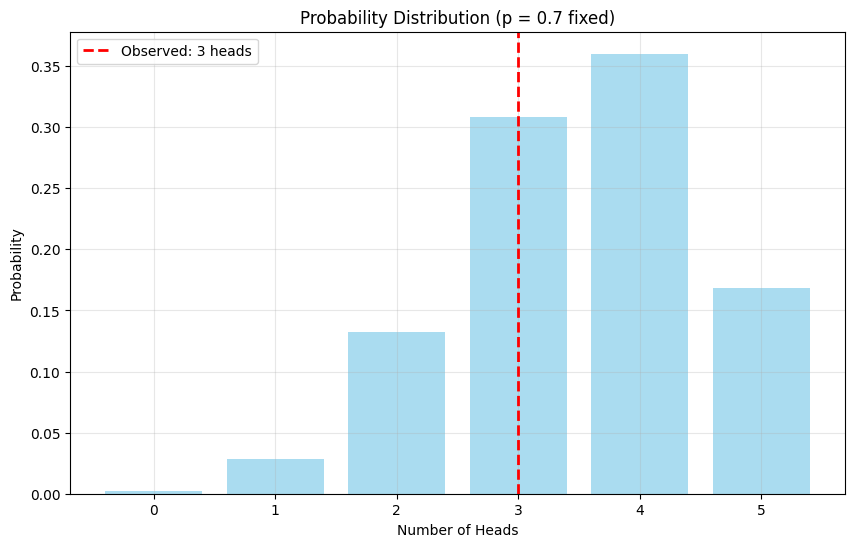

In [3]:
# Plot probability distribution
plt.figure(figsize=(10, 6))
plt.bar(possible_heads, probabilities, alpha=0.7, color='skyblue')
plt.axvline(observed_heads, color='red', linestyle='--', linewidth=2, 
           label=f'Observed: {observed_heads} heads')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title(f'Probability Distribution (p = {known_bias} fixed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


#### Likelihood Perspective: Fixed Data, Varying Parameters

Given that we observed 3 heads in 5 flips, how likely are different bias values?


In [4]:
# Likelihood perspective: fixed data, varying parameters
bias_values = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 for numerical stability
likelihoods = [binom.pmf(observed_heads, n_flips, p) for p in bias_values]

print("Likelihood Perspective (3 heads in 5 flips fixed):")
print("Bias Value | Likelihood")
print("-" * 30)

# Show some key values
key_biases = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in key_biases:
    likelihood = binom.pmf(observed_heads, n_flips, p)
    print(f"{p:10.1f} | {likelihood:.4f}")

# Find the maximum likelihood estimate
max_likelihood_idx = np.argmax(likelihoods)
mle_bias = bias_values[max_likelihood_idx]
max_likelihood = likelihoods[max_likelihood_idx]

print(f"\nMaximum Likelihood Estimate: p = {mle_bias:.3f}")
print(f"Maximum Likelihood Value: {max_likelihood:.4f}")


Likelihood Perspective (3 heads in 5 flips fixed):
Bias Value | Likelihood
------------------------------
       0.1 | 0.0081
       0.3 | 0.1323
       0.5 | 0.3125
       0.6 | 0.3456
       0.7 | 0.3087
       0.8 | 0.2048
       0.9 | 0.0729

Maximum Likelihood Estimate: p = 0.604
Maximum Likelihood Value: 0.3455


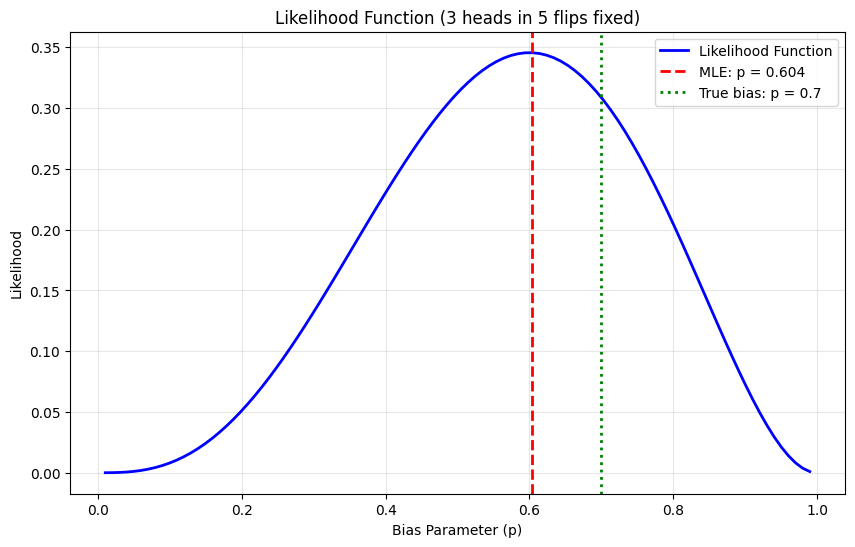

In [5]:
# Plot likelihood function
plt.figure(figsize=(10, 6))
plt.plot(bias_values, likelihoods, 'b-', linewidth=2, label='Likelihood Function')
plt.axvline(mle_bias, color='red', linestyle='--', linewidth=2, 
           label=f'MLE: p = {mle_bias:.3f}')
plt.axvline(known_bias, color='green', linestyle=':', linewidth=2, 
           label=f'True bias: p = {known_bias}')
plt.xlabel('Bias Parameter (p)')
plt.ylabel('Likelihood')
plt.title(f'Likelihood Function (3 heads in 5 flips fixed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Key Insights from the Example

1. **Probability vs Likelihood are the same mathematical object**: Both use the binomial probability mass function, but we're asking different questions.

2. **Maximum Likelihood Estimate**: The bias value that maximizes the likelihood function is p = 0.6, which makes intuitive sense since we observed 3 heads out of 5 flips (3/5 = 0.6).

3. **Likelihood is not a probability**: The likelihood values don't sum to 1 across different parameter values. They're relative measures of how likely different parameter values are.

4. **The likelihood function peaks at the observed proportion**: This is a general property - the MLE often corresponds to the observed sample proportion.


### The Likelihood Function: General Definition

Now that we understand the distinction, let's formalize the likelihood function more generally.

#### For Independent Observations

If we have n independent observations x₁, x₂, ..., xₙ, the likelihood function is:

$$L(\theta | x_1, x_2, ..., x_n) = \prod_{i=1}^{n} P(x_i | \theta)$$

This is the product of individual probabilities because the observations are independent.

#### For Continuous Distributions

For continuous distributions, we use probability density functions instead of probability mass functions:

$$L(\theta | x_1, x_2, ..., x_n) = \prod_{i=1}^{n} f(x_i | \theta)$$

where f(x_i | θ) is the probability density function.


### Implementation: Multiple Observations

Let's extend our coin flipping example to multiple observations to see how the likelihood function behaves.


In [6]:
# Multiple observations example
np.random.seed(42)  # For reproducibility

# Simulate multiple experiments
true_bias = 0.6
n_experiments = 3
flips_per_experiment = 10

# Generate data
observations = []
for i in range(n_experiments):
    heads = np.random.binomial(flips_per_experiment, true_bias)
    observations.append(heads)
    print(f"Experiment {i+1}: {heads} heads out of {flips_per_experiment} flips")

print(f"\nTrue bias: {true_bias}")
print(f"Observed proportions: {[obs/flips_per_experiment for obs in observations]}")


Experiment 1: 7 heads out of 10 flips
Experiment 2: 3 heads out of 10 flips
Experiment 3: 5 heads out of 10 flips

True bias: 0.6
Observed proportions: [0.7, 0.3, 0.5]


In [7]:
# Calculate likelihood for multiple observations
def calculate_likelihood(bias, observations, n_flips):
    """Calculate likelihood for multiple independent observations"""
    likelihood = 1.0
    for heads in observations:
        likelihood *= binom.pmf(heads, n_flips, bias)
    return likelihood

# Calculate likelihood across different bias values
bias_values = np.linspace(0.01, 0.99, 100)
likelihoods = [calculate_likelihood(p, observations, flips_per_experiment) for p in bias_values]

# Find MLE
max_likelihood_idx = np.argmax(likelihoods)
mle_bias = bias_values[max_likelihood_idx]
max_likelihood = likelihoods[max_likelihood_idx]

print(f"Maximum Likelihood Estimate: p = {mle_bias:.3f}")
print(f"Maximum Likelihood Value: {max_likelihood:.2e}")

# Compare with sample proportion
total_heads = sum(observations)
total_flips = n_experiments * flips_per_experiment
sample_proportion = total_heads / total_flips
print(f"Sample proportion: {sample_proportion:.3f}")


Maximum Likelihood Estimate: p = 0.495
Maximum Likelihood Value: 3.37e-03
Sample proportion: 0.500


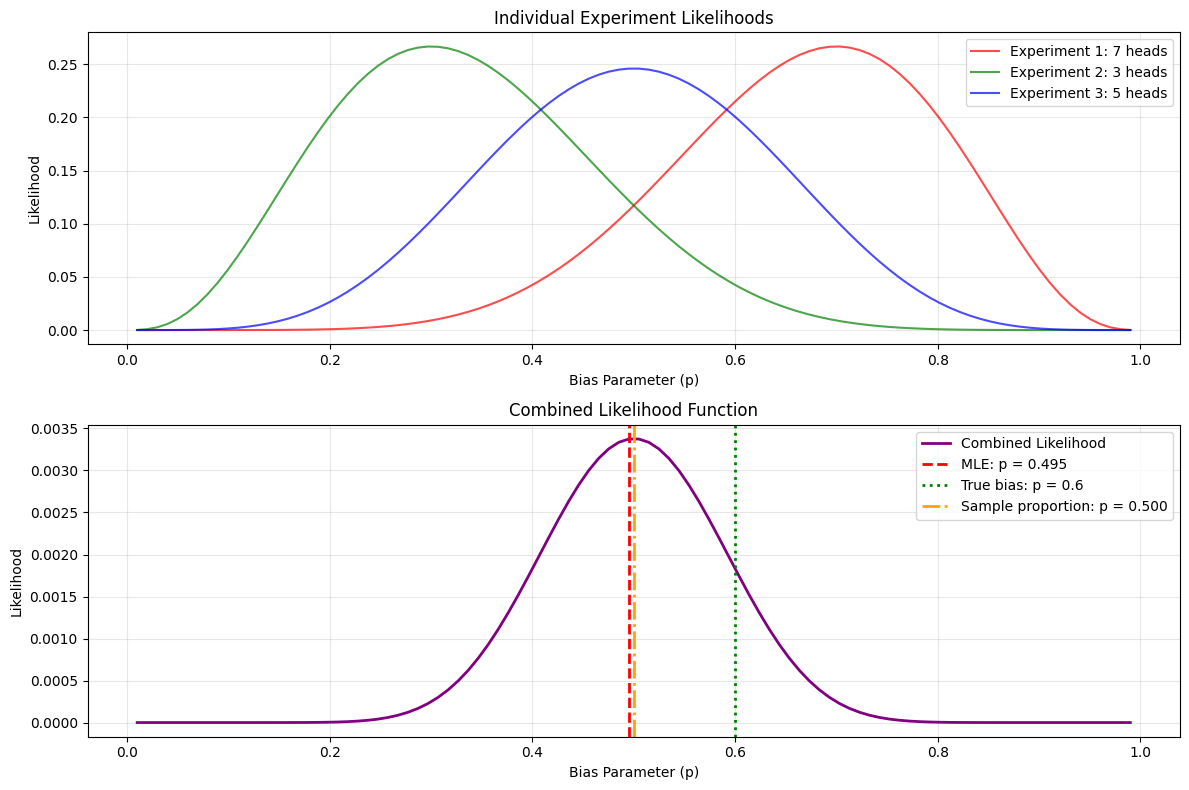

In [8]:
# Plot likelihood function for multiple observations
plt.figure(figsize=(12, 8))

# Plot individual experiment likelihoods
plt.subplot(2, 1, 1)
colors = ['red', 'green', 'blue']
for i, obs in enumerate(observations):
    individual_likelihoods = [binom.pmf(obs, flips_per_experiment, p) for p in bias_values]
    plt.plot(bias_values, individual_likelihoods, color=colors[i], 
             label=f'Experiment {i+1}: {obs} heads', alpha=0.7)

plt.xlabel('Bias Parameter (p)')
plt.ylabel('Likelihood')
plt.title('Individual Experiment Likelihoods')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot combined likelihood
plt.subplot(2, 1, 2)
plt.plot(bias_values, likelihoods, 'purple', linewidth=2, label='Combined Likelihood')
plt.axvline(mle_bias, color='red', linestyle='--', linewidth=2, 
           label=f'MLE: p = {mle_bias:.3f}')
plt.axvline(true_bias, color='green', linestyle=':', linewidth=2, 
           label=f'True bias: p = {true_bias}')
plt.axvline(sample_proportion, color='orange', linestyle='-.', linewidth=2, 
           label=f'Sample proportion: p = {sample_proportion:.3f}')

plt.xlabel('Bias Parameter (p)')
plt.ylabel('Likelihood')
plt.title('Combined Likelihood Function')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Key Properties of the Likelihood Function

From our examples, we can observe several important properties:

1. **Likelihood is not a probability**: The likelihood values don't sum to 1 across parameter values. They represent relative plausibility.

2. **Likelihood is proportional, not absolute**: Only the relative values matter. Multiplying by a constant doesn't change the inference.

3. **Maximum Likelihood Principle**: The parameter value that maximizes the likelihood is our best estimate given the data.

4. **Likelihood gets more concentrated with more data**: As we add more observations, the likelihood function becomes more peaked around the true parameter value.

5. **MLE often equals sample statistics**: For many common distributions, the MLE corresponds to intuitive sample statistics (like the sample mean for normal distributions).


### Connection to Information Theory

The likelihood function connects to the information-theoretic concepts you've already covered:

1. **Cross-entropy**: When we maximize likelihood, we're often minimizing cross-entropy between our model and the empirical distribution.

2. **KL Divergence**: The difference between the true distribution and our model's distribution is measured by KL divergence.

3. **Entropy**: The likelihood function is related to the entropy of the distribution we're trying to estimate.

This connection will become clearer when we discuss log-likelihood and maximum likelihood estimation in detail.


### Summary

We've established the fundamental distinction between probability and likelihood:

- **Probability**: P(X | θ) - Given parameters, what's the probability of data?
- **Likelihood**: L(θ | X) - Given data, how likely are different parameters?

The likelihood function L(θ | X) = P(X | θ) is the same mathematical object viewed from different perspectives. This foundation is crucial for understanding maximum likelihood estimation, which we'll explore in the next notebook.

The key insight is that likelihood provides a principled way to estimate parameters from data, and it forms the foundation for much of modern statistical inference and machine learning.
